In [4]:
import pandas as pd
import seaborn as sns

%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

df = pd.read_csv("./datasets/Melbourne_housing_FULL.csv")

In [5]:
del df['Address']
del df['Method']
del df['SellerG']
del df['Date']
del df['Postcode']
del df['YearBuilt']
del df['Type']
del df['Lattitude']
del df['Longtitude']
del df['Regionname']
del df['Suburb']
del df['CouncilArea']

df.head()

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Propertycount
0,2,NaN,2.5,2.0,1.0,1.0,126.0,NaN,4019.0
1,2,1480000.0,2.5,2.0,1.0,1.0,202.0,NaN,4019.0
2,2,1035000.0,2.5,2.0,1.0,0.0,156.0,79.0,4019.0
3,3,NaN,2.5,3.0,2.0,1.0,0.0,NaN,4019.0
4,3,1465000.0,2.5,3.0,2.0,0.0,134.0,150.0,4019.0


In [6]:
df.isnull().sum()

Rooms                0
Price             7610
Distance             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
Propertycount        3
dtype: int64

<AxesSubplot:>

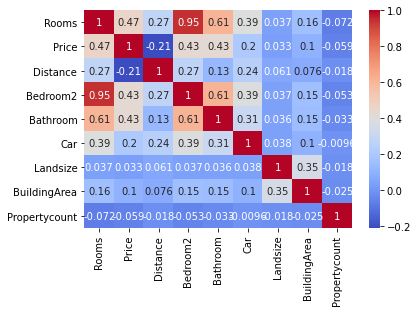

In [7]:
#heatmap to analyze the correlation between all variables combination
df_heat = df.corr()
sns.heatmap(df_heat, annot=True,cmap="coolwarm")

In [8]:
df.shape

(34857, 9)

In [9]:
#remove variables with strong and low correlation
del df['Bedroom2']
del df['Landsize']
del df['Propertycount']

In [10]:
del df['BuildingArea']

#fill missing values with mean for the variable Car
df['Car'].fillna(df['Car'].mean(),inplace=True)

#drop remaining missing values on row-by-row basic
df.dropna(axis=0, how="any", thresh=None, subset=None, inplace=True)

In [11]:
df.shape

(20800, 5)

In [12]:
df.head()

,Rooms,Price,Distance,Bathroom,Car
1,2,1480000.0,2.5,1.0,1.0
2,2,1035000.0,2.5,1.0,0.0
4,3,1465000.0,2.5,2.0,0.0
5,3,850000.0,2.5,2.0,1.0
6,4,1600000.0,2.5,1.0,2.0


In [17]:
X = df[['Rooms','Distance','Bathroom','Car']]
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state = 3, shuffle="True")

In [18]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [20]:
model.intercept_

262533.13311360474

In [21]:
model.coef_

array([264329.71628514, -37572.22475345, 224709.88803969,  51688.06582112])

In [22]:
model_result = pd.DataFrame(model.coef_, X.columns,columns=['Coefficients'])
model_result

,Coefficients
Rooms,264329.716285
Distance,-37572.224753
Bathroom,224709.888040
Car,51688.065821


In [23]:
#prediction
new_house = [2,#rooms
             2.5,#distance
             1,#bathroom
             1,#car
            ]

new_house_predict = model.predict([new_house])
new_house_predict

array([973659.95766106])

In [24]:
#evaluation
#compare diff between expected price prediction for the test set and actual set
prediction = model.predict(X_test)
metrics.mean_absolute_error(y_test, prediction)



362128.3354212203